In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/nlp/datasets")

In [4]:
#source https://www.kaggle.com/shahkan/text-classification-using-logistic-regression

import numpy as np
import pandas as pd

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
%matplotlib inline

In [17]:
dataset = pd.read_csv('bbc-text.csv')
dataset.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


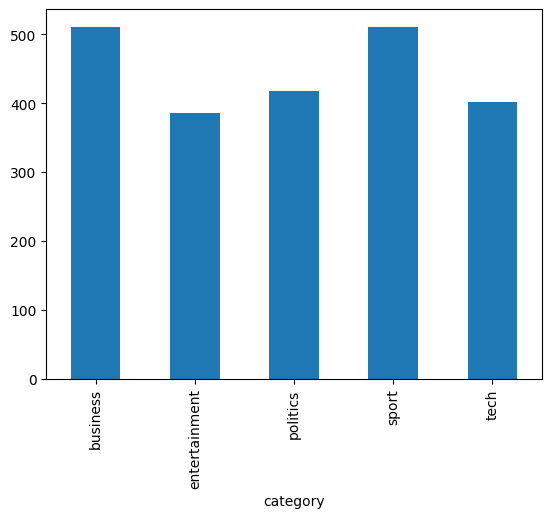

In [18]:
dataset.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [19]:
stemmer = PorterStemmer()
words = stopwords.words("english")
dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [20]:
dataset.head()

,category,text,cleaned
0,tech,tv future in the hands of viewers with home th...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelv raid box offic ocean twelv crime c...


In [21]:
#2225ที่ออกมาคือจำนวนตัวอย่าง ส่วน18846 คือจำนวนฟีเจอร์
vectorizer = TfidfVectorizer(stop_words="english")
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape

(2225, 18846)

In [31]:
from sklearn.linear_model import LogisticRegression
X = dataset['cleaned']
Y = dataset['category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

#ช่วยสร้างลำดับการทำงานของเรา
pipeline = Pipeline([('vect', vectorizer),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)

In [32]:
ytest = np.array(y_test)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the model on the test set: {accuracy}")

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, predictions))
print(confusion_matrix(ytest, predictions))

Accuracy of the model on the test set: 0.9797752808988764
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       102
entertainment       0.99      1.00      0.99        70
     politics       0.99      0.94      0.96        94
        sport       0.99      0.99      0.99        96
         tech       0.98      1.00      0.99        83

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

[[100   0   1   0   1]
 [  0  70   0   0   0]
 [  3   1  88   1   1]
 [  1   0   0  95   0]
 [  0   0   0   0  83]]


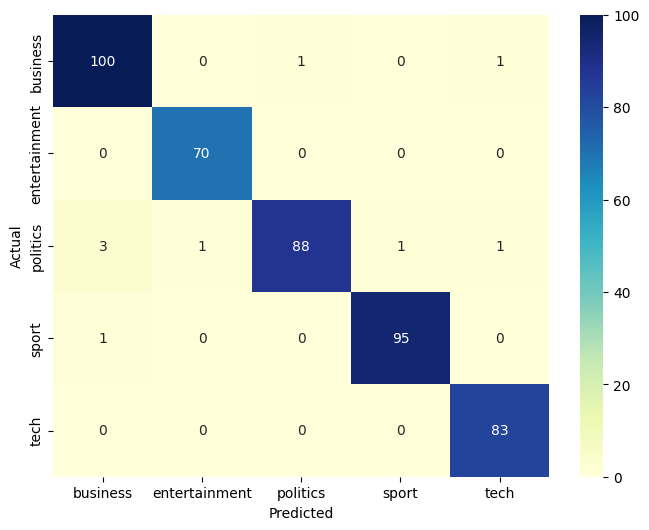

In [33]:
# prompt: display  graph of confusion matrix with colors

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

conf_mat = confusion_matrix(ytest, predictions)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(ytest), yticklabels=np.unique(ytest),
            cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
#เลือกข้อมมูลมาทำ พร้อมกับอธิบายอะไรเป็นอะไร จำนวนฟีเจอร์ใช้อะไร หาเองหรือไง ระบุจำนวนฟืเจอร์ ปริ้นตัวอย่างฟีเจอร์ให้ดูด้วย ทำไมทำพรีโปตัวนั้นอธิบาย ตีความแอคออกมาด้วย ที่มาของตัวเลขยังไง อธิบายแต่ละสเตปที่ทำ